In [53]:
mport pandas as pd

# Load the data
df = pd.read_csv('loss_runs_UNet.csv')
#remove all columns that don't start with a number, except for 'epoch'
df = df.loc[:, df.columns.str.match(r'^\d|epoch')]

#remove allc olumns with the word step in them
df = df.loc[:, ~df.columns.str.contains('step')]

#remove all columns with the word MAX or MIN in them
df = df.loc[:, ~df.columns.str.contains('MAX')]
df = df.loc[:, ~df.columns.str.contains('MIN')]

#remove all column with the word train in them
df = df.loc[:, ~df.columns.str.contains('train')]

#combine columns 7_swin and 7_cont into one (either side has nan values where the other has values)
#df['7 - SwinUNETR'] = df['7_swin - val_loss'].combine_first(df['7_cont - val_loss'])
df = df.drop(columns=['7_swin - val_loss', '7_cont - val_loss'])
df['3 - Input 256, dropout, scaling 0-1'] = df['5_input size 256 and dropout - val_loss'].combine_first(df['5_cont - val_loss'])
df = df.drop(columns=['5_input size 256 and dropout - val_loss', '5_cont - val_loss'])
df['1 - Input 128, normalisation'] = df['2_z-score_normalisation - val_loss'].combine_first(df['2_cont - val_loss'])
df = df.drop(columns=['2_z-score_normalisation - val_loss', '2_cont - val_loss'])

#rename 4_input size 128 no intensity scaling, histogram equilisation - val_loss to 4
df = df.rename(columns={'4_input size 128 no intensity scaling, histogram equilisation - val_loss': '2 - Input 128, equalisation'})
#rename 6_5 levels - val_loss to 6
df = df.rename(columns={'6_5 levels - val_loss': '4 - Input 256, extra depth level'})

#sort columns by name
df = df.reindex(sorted(df.columns), axis=1)
#put epoch column first
cols = list(df.columns)
cols.remove('epoch')
cols.insert(0, 'epoch')
df = df[cols]

df

,epoch,"1 - Input 128, normalisation","2 - Input 128, equalisation","3 - Input 256, dropout, scaling 0-1","4 - Input 256, extra depth level"
0,0,0.602678,0.571791,0.394105,0.415109
1,1,0.517345,0.434678,0.313420,0.314957
2,2,0.514328,0.378457,0.279864,0.274495
3,3,0.424014,0.381569,0.235938,0.235701
4,4,0.401572,0.329073,0.225886,0.317959
...,...,...,...,...,...
96,96,0.210995,NaN,NaN,NaN
97,97,0.208395,NaN,NaN,NaN
98,98,0.219682,NaN,NaN,NaN
99,99,0.246861,NaN,NaN,NaN


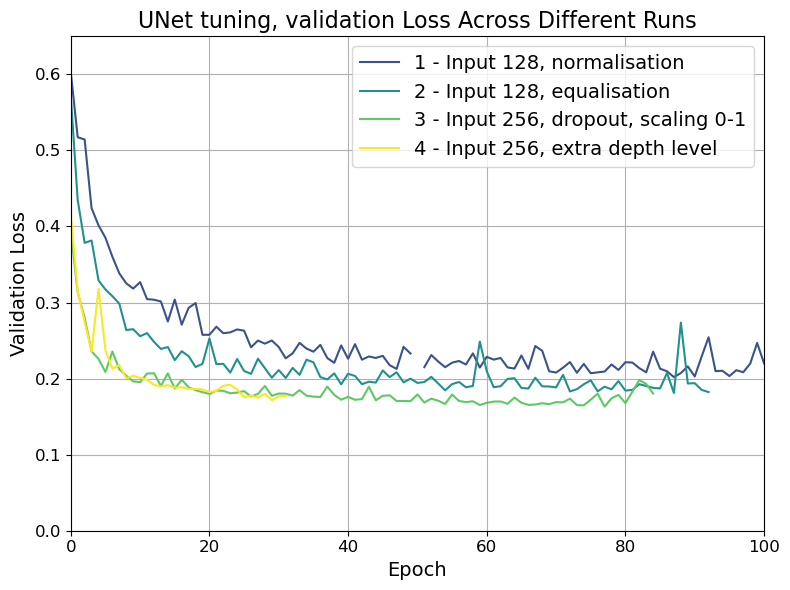

In [63]:
import matplotlib.pyplot as plt

#all columns except e pochs
val_loss_columns = df.columns[1:]

# colormap with gradient 
cmap = plt.get_cmap('viridis')

# Plotting the extracted columns
plt.figure(figsize=(8, 6))
for col in val_loss_columns:
    plt.plot(df['epoch'], df[col], label=col, color=cmap(float(col.split(' - ')[0])/len(val_loss_columns)))

#make ticks bigger
plt.xticks(fontsize='12')
plt.yticks(fontsize='12')

plt.ylim(0, 0.65)
plt.xlim(0, 100)
plt.xlabel('Epoch', fontsize='14')
plt.ylabel('Validation Loss', fontsize='14')
plt.title('UNet tuning, validation Loss Across Different Runs', fontsize='16')
plt.legend(fontsize='14')
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/loss_runs_UNet.png')
plt.show()